In [1]:
# Problema de negócio: "Identificar os principais fatores que impulsionam as vendas semanais das lojas Walmart
# construir um modelo preditivo capaz de estimar a receita futura, permitindo decisões estratégicas de estoque, marketing e operação".
#Dataset: https://www.kaggle.com/code/mikhail1681/walmart-weekly-revenue-prediction

In [2]:
from platform import python_version
print("Versão da Linguagem Python neste Jupyter Notebook:", python_version())

Versão da Linguagem Python neste Jupyter Notebook: 3.13.5


In [3]:
# 1-Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
# 2-Carregando os Dados
df= pd.read_csv("Walmart_sales.csv")

In [5]:
df.shape

(6435, 8)

In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
# 3-Análise exploratória

In [10]:
#Verifica se a valores ausentes
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
# 4-Resumo estatístico
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
# 5-Pré-processamento
df['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.dropna()

In [16]:
# 6--Seleção de features
X = df[['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']]
y = df['Weekly_Sales']

In [17]:
# 7-Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 8-Treinar modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# 9-Avaliar modelo
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 60872.690458869394
R²: 0.9678724025834563


In [20]:
# 10-Importância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

Store           0.730621
CPI             0.155840
Unemployment    0.085112
Temperature     0.012454
Fuel_Price      0.010868
Month           0.003825
Year            0.001280
dtype: float64


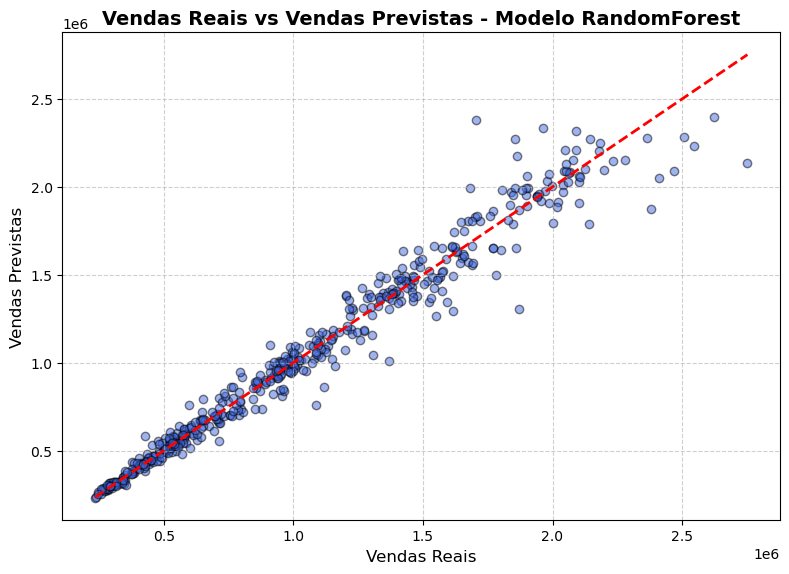

In [21]:
# 11-Gráfico de vendas reais X vendas previstas
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # linha ideal
plt.xlabel('Vendas Reais', fontsize=12)
plt.ylabel('Vendas Previstas', fontsize=12)
plt.title('Vendas Reais vs Vendas Previstas - Modelo RandomForest', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [22]:
#Pontos próximos da linha vermelha → modelo previu bem.
#Pontos muito afastados → onde o modelo errou mais.